<a href="https://colab.research.google.com/github/matheusfsanna/dados_f1/blob/main/f1_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nova seção
Tratando os dados do arquivo pilotos para obter nome_completo e idade


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [ ]:
pilotos = pd.read_csv('/content/drive/MyDrive/F1_stats/drivers.csv')

In [ ]:
pilotos.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [ ]:
def calcular_idade(data_nascimento):
    hoje = datetime.date.today()
    idade = hoje.year - data_nascimento.year - ((hoje.month, hoje.day) < (data_nascimento.month, data_nascimento.day))
    return idade

In [ ]:
# Certifique-se que a coluna 'dob' está no formato de data
pilotos['dob'] = pd.to_datetime(pilotos['dob'])

# Calcula a idade e cria uma nova coluna
pilotos['idade'] = pilotos['dob'].apply(calcular_idade)

In [ ]:
pilotos

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,idade
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,39
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,47
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,39
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,43
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,42
...,...,...,...,...,...,...,...,...,...,...
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries,29
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri,23
856,858,sargeant,2,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant,23
857,859,lawson,40,LAW,Liam,Lawson,2002-02-11,New Zealander,http://en.wikipedia.org/wiki/Liam_Lawson,22


In [ ]:
pilotos = pilotos[['driverId', 'driverRef', 'forename', 'surname', 'idade']]

In [ ]:
# 1. Crie a coluna 'nome_completo' concatenando 'forename' e 'surname'
pilotos['nome_completo'] = pilotos['forename'] + ' ' + pilotos['surname']

# 2. Exclua as colunas 'forename' e 'surname'
pilotos = pilotos.drop(['forename', 'surname'], axis=1)

# 3. Exiba o DataFrame 'pilotos' com a nova coluna 'nome_completo'
pilotos

<ipython-input-23-348011630ccd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pilotos['nome_completo'] = pilotos['forename'] + ' ' + pilotos['surname']


,driverId,driverRef,idade,nome_completo
0,1,hamilton,39,Lewis Hamilton
1,2,heidfeld,47,Nick Heidfeld
2,3,rosberg,39,Nico Rosberg
3,4,alonso,43,Fernando Alonso
4,5,kovalainen,42,Heikki Kovalainen
...,...,...,...,...
854,856,de_vries,29,Nyck de Vries
855,857,piastri,23,Oscar Piastri
856,858,sargeant,23,Logan Sargeant
857,859,lawson,22,Liam Lawson


In [ ]:
pilotos.to_csv('pilotos.csv', index=False)

# Comparando com a classificação

In [ ]:
classificacao = pd.read_csv('/content/drive/MyDrive/F1_stats/driver_standings.csv', index_col=0)

In [ ]:
classificacao.head()

,raceId,driverId,points,position,positionText,wins
driverStandingsId,,,,,,
1,18,1,10.0,1,1,1
2,18,2,8.0,2,2,0
3,18,3,6.0,3,3,0
4,18,4,5.0,4,4,0
5,18,5,4.0,5,5,0


In [ ]:
# 1. Certifique-se que 'driverId' é uma coluna e não o índice do DataFrame 'classificacao'
classificacao = classificacao.reset_index()

# 2. Faça um merge dos DataFrames 'classificacao' e 'pilotos' usando a coluna 'driverId'
classificacao = pd.merge(classificacao, pilotos[['driverId', 'nome_completo']], on='driverId', how='left')

# 3. Exiba o DataFrame 'classificacao' com a nova coluna 'nome_completo'
classificacao

,driverStandingsId,raceId,driverId,points,position,positionText,wins,nome_completo
0,1,18,1,10.0,1,1,1,Lewis Hamilton
1,2,18,2,8.0,2,2,0,Nick Heidfeld
2,3,18,3,6.0,3,3,0,Nico Rosberg
3,4,18,4,5.0,4,4,0,Fernando Alonso
4,5,18,5,4.0,5,5,0,Heikki Kovalainen
...,...,...,...,...,...,...,...,...
34632,72909,1134,839,5.0,17,17,0,Esteban Ocon
34633,72910,1134,848,4.0,18,18,0,Alexander Albon
34634,72911,1134,855,0.0,19,19,0,Guanyu Zhou
34635,72912,1134,858,0.0,20,20,0,Logan Sargeant


In [ ]:
classificacao = classificacao[['driverStandingsId', 'raceId', 'driverId', 'points', 'position','wins', 'nome_completo']]

In [ ]:
classificacao

,driverStandingsId,raceId,driverId,points,position,wins,nome_completo
0,1,18,1,10.0,1,1,Lewis Hamilton
1,2,18,2,8.0,2,0,Nick Heidfeld
2,3,18,3,6.0,3,0,Nico Rosberg
3,4,18,4,5.0,4,0,Fernando Alonso
4,5,18,5,4.0,5,0,Heikki Kovalainen
...,...,...,...,...,...,...,...
34632,72909,1134,839,5.0,17,0,Esteban Ocon
34633,72910,1134,848,4.0,18,0,Alexander Albon
34634,72911,1134,855,0.0,19,0,Guanyu Zhou
34635,72912,1134,858,0.0,20,0,Logan Sargeant


# Unindo os dados em um dataframe com nome do piloto, posição, etapa, circuito e ano



In [ ]:
corridas = pd.read_csv('/content/drive/MyDrive/F1_stats/races.csv')
circuitos = corridas[['raceId', 'year', 'round', 'circuitId', 'name', 'date']]
circuitos

,raceId,year,round,circuitId,name,date
0,1,2009,1,1,Australian Grand Prix,2009-03-29
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05
2,3,2009,3,17,Chinese Grand Prix,2009-04-19
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26
4,5,2009,5,4,Spanish Grand Prix,2009-05-10
...,...,...,...,...,...,...
1120,1140,2024,20,32,Mexico City Grand Prix,2024-10-27
1121,1141,2024,21,18,São Paulo Grand Prix,2024-11-03
1122,1142,2024,22,80,Las Vegas Grand Prix,2024-11-23
1123,1143,2024,23,78,Qatar Grand Prix,2024-12-01


In [ ]:
# 1. Faça o merge dos DataFrames 'classificacao' e 'circuitos' usando a coluna 'raceId',
# incluindo as colunas 'year' e 'round'
classificacao = pd.merge(classificacao, circuitos[['raceId', 'name', 'year', 'round']], on='raceId', how='left')

# 2. Renomeie a coluna 'name' para 'nome_corrida'
classificacao = classificacao.rename(columns={'name': 'nome_corrida'})

# 3. Exiba o DataFrame 'classificacao' com as novas colunas
classificacao

,driverStandingsId,raceId,driverId,points,position,wins,nome_completo,nome_corrida,year,round
0,1,18,1,10.0,1,1,Lewis Hamilton,Australian Grand Prix,2008,1
1,2,18,2,8.0,2,0,Nick Heidfeld,Australian Grand Prix,2008,1
2,3,18,3,6.0,3,0,Nico Rosberg,Australian Grand Prix,2008,1
3,4,18,4,5.0,4,0,Fernando Alonso,Australian Grand Prix,2008,1
4,5,18,5,4.0,5,0,Heikki Kovalainen,Australian Grand Prix,2008,1
...,...,...,...,...,...,...,...,...,...,...
34632,72909,1134,839,5.0,17,0,Esteban Ocon,Belgian Grand Prix,2024,14
34633,72910,1134,848,4.0,18,0,Alexander Albon,Belgian Grand Prix,2024,14
34634,72911,1134,855,0.0,19,0,Guanyu Zhou,Belgian Grand Prix,2024,14
34635,72912,1134,858,0.0,20,0,Logan Sargeant,Belgian Grand Prix,2024,14


In [ ]:
classificacao.to_csv('classificacao.csv', index=False)

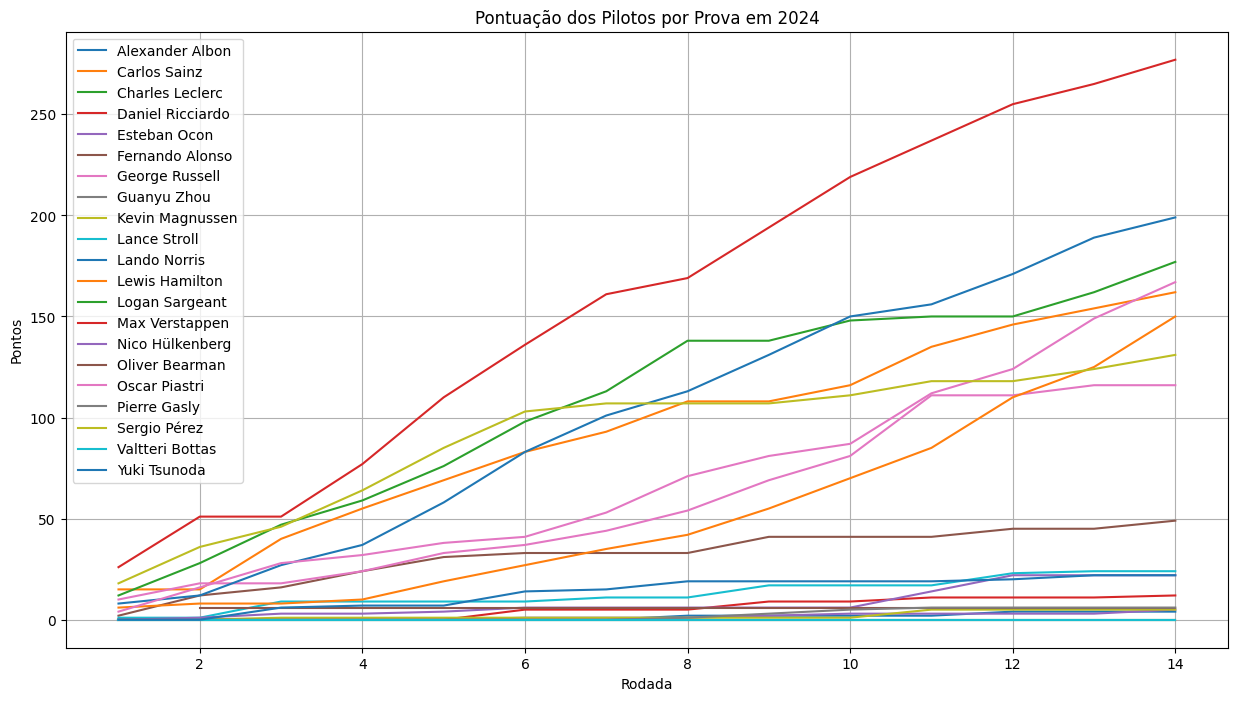

In [ ]:


# Filtrar os dados para o ano de 2024
classificacao_2024 = classificacao[classificacao['year'] == 2024]

# Agrupar os dados por piloto e rodada
pilotos_pontos = classificacao_2024.groupby(['nome_completo', 'round'])['points'].sum().reset_index()

# Criar o gráfico de linhas
plt.figure(figsize=(15, 8))
for piloto in pilotos_pontos['nome_completo'].unique():
    piloto_data = pilotos_pontos[pilotos_pontos['nome_completo'] == piloto]
    plt.plot(piloto_data['round'], piloto_data['points'], label=piloto)

plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.title('Pontuação dos Pilotos por Prova em 2024')
plt.legend()
plt.grid(True)
plt.show()


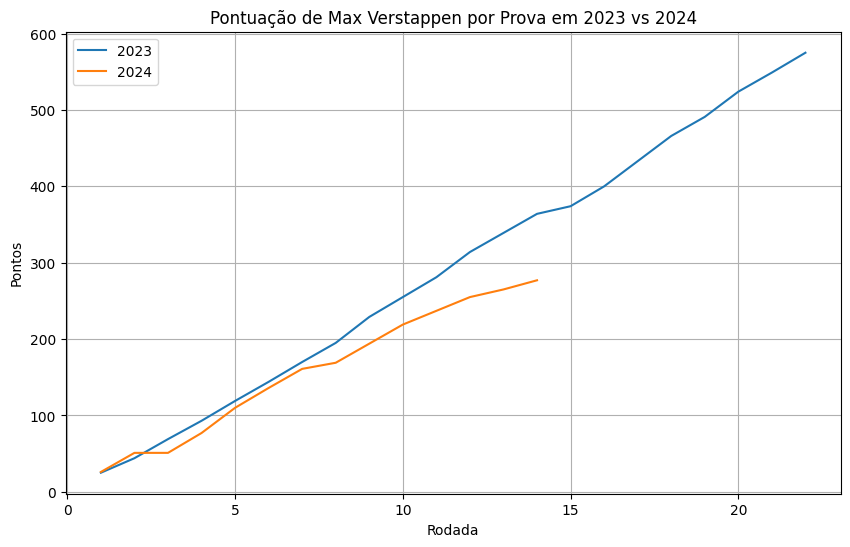

In [ ]:
# Filtrar os dados para Max Verstappen em 2023
verstappen_2023 = classificacao[(classificacao['nome_completo'] == 'Max Verstappen') & (classificacao['year'] == 2023)]

# Agrupar os dados por rodada
verstappen_pontos_2023 = verstappen_2023.groupby('round')['points'].sum().reset_index()

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(verstappen_pontos_2023['round'], verstappen_pontos_2023['points'], label='2023')
plt.plot(verstappen_pontos['round'], verstappen_pontos['points'], label='2024')

plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.title('Pontuação de Max Verstappen por Prova em 2023 vs 2024')
plt.legend()
plt.grid(True)
plt.show()


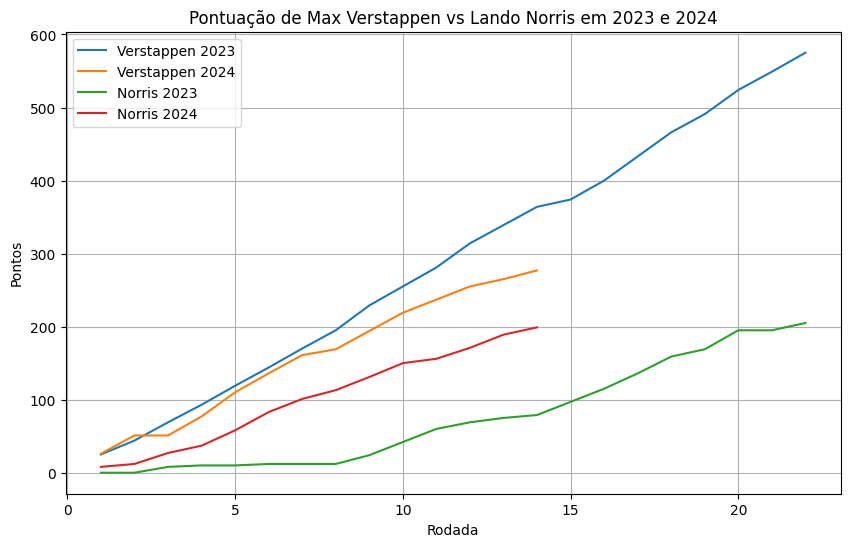

In [ ]:

# Filtrar os dados para Max Verstappen e Lando Norris em 2023 e 2024
verstappen_2023 = classificacao[(classificacao['nome_completo'] == 'Max Verstappen') & (classificacao['year'] == 2023)]
verstappen_2024 = classificacao[(classificacao['nome_completo'] == 'Max Verstappen') & (classificacao['year'] == 2024)]
norris_2023 = classificacao[(classificacao['nome_completo'] == 'Lando Norris') & (classificacao['year'] == 2023)]
norris_2024 = classificacao[(classificacao['nome_completo'] == 'Lando Norris') & (classificacao['year'] == 2024)]

# Agrupar os dados por rodada
verstappen_pontos_2023 = verstappen_2023.groupby('round')['points'].sum().reset_index()
verstappen_pontos_2024 = verstappen_2024.groupby('round')['points'].sum().reset_index()
norris_pontos_2023 = norris_2023.groupby('round')['points'].sum().reset_index()
norris_pontos_2024 = norris_2024.groupby('round')['points'].sum().reset_index()

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(verstappen_pontos_2023['round'], verstappen_pontos_2023['points'], label='Verstappen 2023')
plt.plot(verstappen_pontos_2024['round'], verstappen_pontos_2024['points'], label='Verstappen 2024')
plt.plot(norris_pontos_2023['round'], norris_pontos_2023['points'], label='Norris 2023')
plt.plot(norris_pontos_2024['round'], norris_pontos_2024['points'], label='Norris 2024')

plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.title('Pontuação de Max Verstappen vs Lando Norris em 2023 e 2024')
plt.legend()
plt.grid(True)
plt.show()
